In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Iris.csv')
data.shape

(150, 6)

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
x_petal = np.array(data.drop(['Id', 'PetalLengthCm', 'PetalWidthCm','Species'], axis=1))

In [5]:
import math
def eucledian_dist(x1,x2):
    return math.sqrt(sum((x1 - x2)**2))

In [25]:
def KMean(x,k,max_itr):
    centroids = np.zeros((k,x.shape[1]))
    for i in range(k):
        centroids[i] = x[np.random.choice(range(x.shape[0]))]
        
    for i in range(max_itr):
        # Clusters
        clusters = [[] for i in range(k)]
        for point_i,point in enumerate(x):
            d = list()
            for c_i,c in enumerate(centroids):
                d.append([eucledian_dist(point,c),c_i])
            centroid = min(d)[1]
            clusters[centroid].append(point_i)
        # Mean
        mean_centroids = np.zeros((k,x.shape[1]))
        for cluster_i, cluster in enumerate(clusters):
            mean_centroids[cluster_i] = np.mean(x[cluster], axis=0)
        # Check old and new centroids
        diff = mean_centroids - centroids
        if not diff.any():
            break
        else:
            centroids = mean_centroids
    return clusters

In [26]:
clusters = KMean(x_petal,3,100)

[Text(0.5, 1.0, 'Actual data'),
 Text(0, 0.5, 'Petal Width'),
 Text(0.5, 0, 'SPetal Length')]

<Figure size 432x288 with 0 Axes>

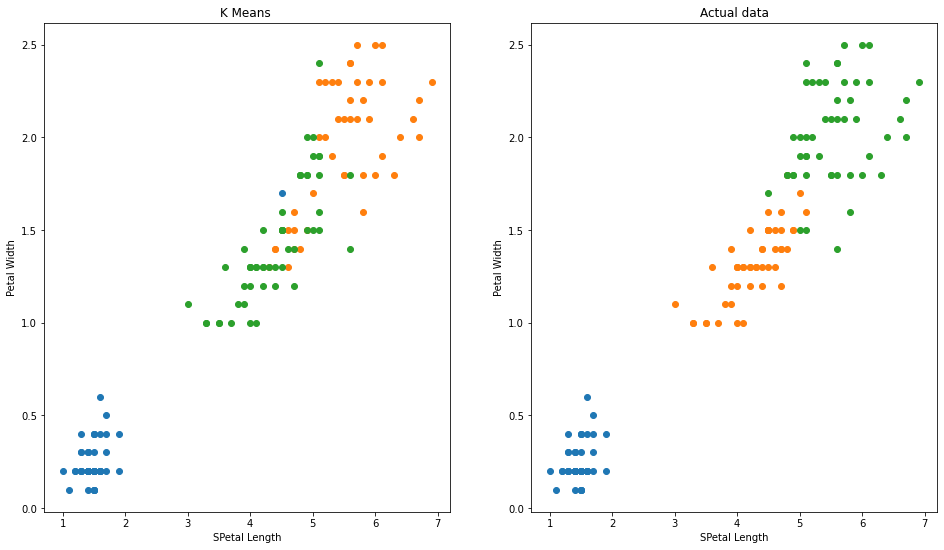

In [30]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(16, 9))

ax[0].scatter(data['PetalLengthCm'][clusters[0]],data['PetalWidthCm'][clusters[0]])
ax[0].scatter(data['PetalLengthCm'][clusters[1]],data['PetalWidthCm'][clusters[1]])
ax[0].scatter(data['PetalLengthCm'][clusters[2]],data['PetalWidthCm'][clusters[2]])

ax[1].scatter(data[data['Species']=='Iris-setosa']['PetalLengthCm'],data[data['Species']=='Iris-setosa']['PetalWidthCm'])
ax[1].scatter(data[data['Species']=='Iris-versicolor']['PetalLengthCm'],data[data['Species']=='Iris-versicolor']['PetalWidthCm'])
ax[1].scatter(data[data['Species']=='Iris-virginica']['PetalLengthCm'],data[data['Species']=='Iris-virginica']['PetalWidthCm'])

ax[0].set(title='K Means ', ylabel='Petal Width',xlabel='SPetal Length')
ax[1].set(title='Actual data',  ylabel='Petal Width',xlabel='SPetal Length')